In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import re
sns.set(font_scale=2)

In [2]:
df = pd.read_pickle('aggName_wo_emojis.pkl')

In [3]:
# df = df.drop(columns='Unnamed: 0')
df.head()

,name,type,handle,date,likeCount,retweetCount,domain,i_e,n_s,t_f,j_p,docs,lemmatized,freqTableCeleb,noon_21,fiveAm_noon,nightowl
0,anggun official,enfj,Anggun_Cipta,"[2018-12-18 04:07:37+00:00, 2018-12-19 04:50:1...",31232,4890,diplomat,e,n,f,j,[I love hearing my voice dubbed in German 😊. #...,love hearing voice dubbed german artede artefr...,annoyed 83 uneasy 83 hesitant 83 w...,45.4,38.1,16.5
1,ansel elgort,enfj,AnselElgort,"[2014-01-25 22:35:29+00:00, 2014-01-26 05:40:2...",3652646,1287249,diplomat,e,n,f,j,[COOKIEEESSS Aaayyyyy #girlscouts #austintexas...,aaayyyyy could call candy played lazer tag wen...,happy 85 face 75 smiley 70 t...,55.1,8.2,36.7
2,ashton irwin,enfj,Ashton5SOS,"[2021-01-30 21:22:27+00:00, 2021-01-31 18:18:3...",10404214,1279713,diplomat,e,n,f,j,"[@vauItlive Yeah I’m just doing laundry lol, P...",yeah laundry lol pennys fan pink sweater skull...,love 52 annoyed 47 hesitant 47 u...,68.7,6.6,24.7
3,basti schweinsteiger,enfj,BSchweinsteiger,"[2020-11-28 13:08:00+00:00, 2020-12-03 16:32:0...",3027159,245013,diplomat,e,n,f,j,[Sea or Mountains - what's your favorite? #thr...,favorite annoyed uneasy hesitant classic itali...,uneasy 188 hesitant 188 annoyed 18...,67.2,29.4,3.4
4,carles puyol,enfj,Carles5puyol,"[2016-10-30 12:55:05+00:00, 2016-11-27 14:44:3...",1842861,231403,diplomat,e,n,f,j,[Nice too meet you! @NikiLauda_F1 Loved chatti...,nice meet loved chatting best annoyed uneasy h...,annoyed 19 uneasy 19 hesitant 19 s...,73.9,11.6,14.5


In [4]:
df.type.value_counts()

esfp    87
enfp    48
esfj    45
estp    42
entp    41
isfp    39
enfj    29
isfj    28
istp    27
infj    21
entj    20
estj    17
infp    12
intj    11
istj    10
intp     8
Name: type, dtype: int64

In [5]:
df.head(1)

,name,type,handle,date,likeCount,retweetCount,domain,i_e,n_s,t_f,j_p,docs,lemmatized,freqTableCeleb,noon_21,fiveAm_noon,nightowl
0,anggun official,enfj,Anggun_Cipta,"[2018-12-18 04:07:37+00:00, 2018-12-19 04:50:1...",31232,4890,diplomat,e,n,f,j,[I love hearing my voice dubbed in German 😊. #...,love hearing voice dubbed german artede artefr...,annoyed 83 uneasy 83 hesitant 83 w...,45.4,38.1,16.5


In [6]:
# df['avg_words'] = 
c=0
words_per_tweet = []
for celeb in df.docs:
    words = 0
    tweets = 0
    for tweet in celeb:
        tweets += 1
        words += len(tweet.split(' '))
    # print(f'Celeb: {c}, Tweets: {tweets}, Words: {words}')
    words_per_tweet.append(round((words/tweets),2))
    c +=1
df['words_per_tweet'] = words_per_tweet

In [7]:
char_per_tweet = []
for celeb in df.docs:
    tweets = 0
    chars = 0
    for tweet in celeb:
        tweets += 1
        chars += len(tweet)
    char_per_tweet.append(round((chars/tweets),2))
df['char_per_tweet'] = char_per_tweet

In [8]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

s = nltk.sentiment.SentimentIntensityAnalyzer()
df['sentiment'] = df.lemmatized.apply(lambda doc: s.polarity_scores(doc)['compound'])

In [9]:
df.shape

(485, 20)

In [10]:
# create train and test (80/20 split) from the orginal dataframe
train, test = train_test_split(df, test_size=0.2, random_state=123)
# create train and validate (75/25 split) from the train dataframe
train, val = train_test_split(train, test_size=.25, random_state=123)

In [11]:
train.shape, val.shape, test.shape

((291, 20), (97, 20), (97, 20))

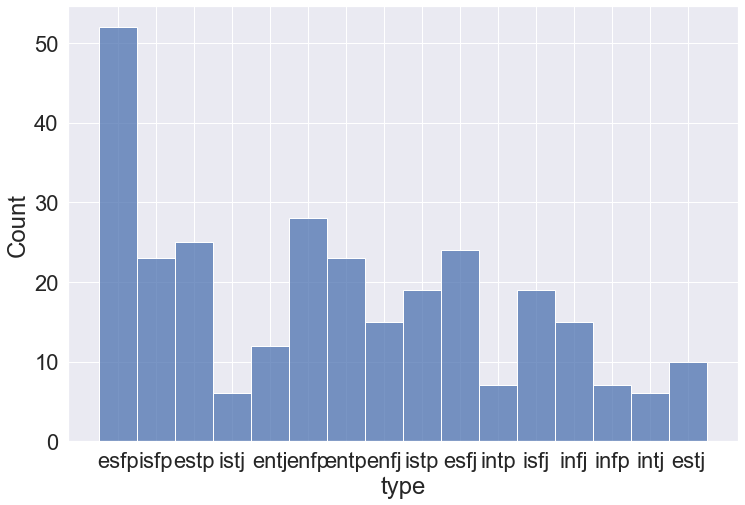

In [12]:
plt.figure(figsize=(12,8))
sns.histplot(train, x='type')
plt.show()

In [13]:
train.head()

,name,type,handle,date,likeCount,retweetCount,domain,i_e,n_s,t_f,j_p,docs,lemmatized,freqTableCeleb,noon_21,fiveAm_noon,nightowl,words_per_tweet,char_per_tweet,sentiment
224,jessie j,esfp,JessieJ,"[2017-10-16 12:10:24+00:00, 2017-10-17 12:32:2...",809676,135418,explorer,e,s,f,p,"[AMSTERDAM, SEE YOU TONIGHT 🌹 https://t.co/W6S...",tonight annoyed uneasy hesitant show paradiso ...,uneasy 214 hesitant 214 annoyed 21...,55.4,14.9,29.6,20.47,133.39,-0.9994
268,valentino rossi,esfp,ValeYellow46,"[2020-09-25 22:23:58+00:00, 2020-09-27 07:24:0...",1787200,112481,explorer,e,s,f,p,"[Circuit de Catalunya,Barcelona,Spain\nFriday,...",circuit spain friday free practice tino martin...,annoyed 384 hesitant 384 uneasy 38...,45.8,31.8,22.4,10.60,102.13,-1.0000
444,tom felton,isfp,TomFelton,"[2019-03-20 10:17:12+00:00, 2019-03-22 19:55:5...",8704107,649623,explorer,i,s,f,p,"[and twiglets, Right @dutchcomiccon let’s get ...",twiglets right lets ill never forget tiger mas...,hesitant 272 uneasy 272 annoyed 27...,67.8,5.5,26.7,15.65,104.01,-1.0000
206,dj khaled,esfp,djkhaled,"[2021-05-24 21:56:13+00:00, 2021-05-24 23:53:0...",1404100,201279,explorer,e,s,f,p,[MAY 27 WORLD PREM #IDIDIT #VIDEO 🎥🔥\n@djkhale...,may world prem ididit video djkhaled lilbaby d...,annoyed 288 uneasy 288 hesitant 28...,59.6,4.2,36.2,20.03,150.23,-0.9999
194,brad paisley,esfp,BradPaisley,"[2018-09-16 19:50:18+00:00, 2018-09-16 20:03:5...",470803,25242,explorer,e,s,f,p,[Jeeminy. #dawgpound instagram.com/p/BnzKGxsB-...,jeeminy bnzkgxsb cz going pretend another tie ...,annoyed 239 uneasy 239 hesitant 23...,40.6,5.3,54.1,20.17,147.16,-0.9973


<AxesSubplot:xlabel='domain', ylabel='Count'>

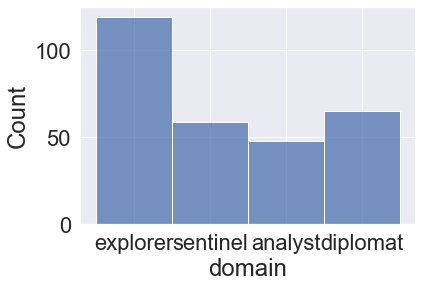

In [14]:
sns.histplot(train, x='domain')

In [15]:
train[train['i_e'] == 'i'].sentiment.mean(), train[train['i_e'] == 'e'].sentiment.mean()

(0.07067745098039217, -0.0970206349206349)

In [16]:
train[train['n_s'] == 'n'].sentiment.mean(), train[train['n_s'] == 's'].sentiment.mean()

(0.15227433628318587, -0.15918426966292135)

In [17]:
train[train['t_f'] == 't'].sentiment.mean(), train[train['t_f'] == 'f'].sentiment.mean()

(-0.0767527777777778, -0.01551092896174864)

In [18]:
train[train['j_p'] == 'j'].sentiment.mean(), train[train['j_p'] == 'p'].sentiment.mean()

(0.2129158878504672, -0.18429239130434788)

In [19]:
train[train.type == 'infj'].sentiment.mean(), train[train.type == 'estp'].sentiment.mean()

(0.19887999999999997, -0.03816800000000001)

In [20]:
{'diplomat':train[train.domain == 'diplomat'].sentiment.mean(), 
 'explorer':train[train.domain == 'explorer'].sentiment.mean(), 
 'analyst':train[train.domain == 'analyst'].sentiment.mean(),
 'sentinel':train[train.domain == 'sentinel'].sentiment.mean()}

{'diplomat': 0.22935692307692312,
 'explorer': -0.29533697478991594,
 'analyst': 0.047891666666666666,
 'sentinel': 0.11542881355932201}

/opt/homebrew/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='words_per_tweet', ylabel='sentiment'>

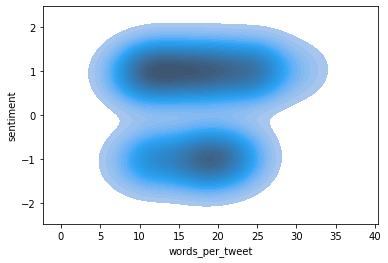

In [21]:
sns.kdeplot(train[train.domain == 'diplomat'].words_per_tweet, train[train.domain == 'diplomat'].sentiment, levels=30, shade=True)

/opt/homebrew/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='words_per_tweet', ylabel='sentiment'>

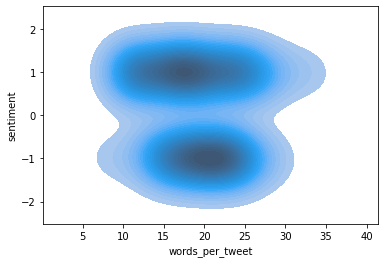

In [222]:
sns.kdeplot(train[train.domain == 'sentinel'].words_per_tweet, train[train.domain == 'sentinel'].sentiment, levels=30, shade=True)

/opt/homebrew/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='words_in_tweet', ylabel='sentiment'>

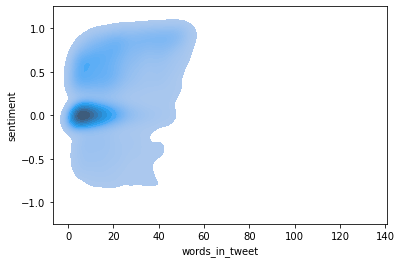

In [19]:
sns.kdeplot(train[train.domain == 'analyst'].words_in_tweet, train[train.domain == 'analyst'].sentiment, levels=30, shade=True)

/opt/homebrew/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='words_per_tweet', ylabel='sentiment'>

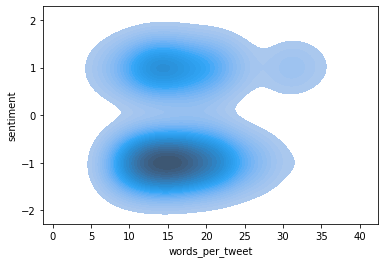

In [223]:
sns.kdeplot(train[train.domain == 'explorer'].words_per_tweet, train[train.domain == 'explorer'].sentiment, levels=30, shade=True)

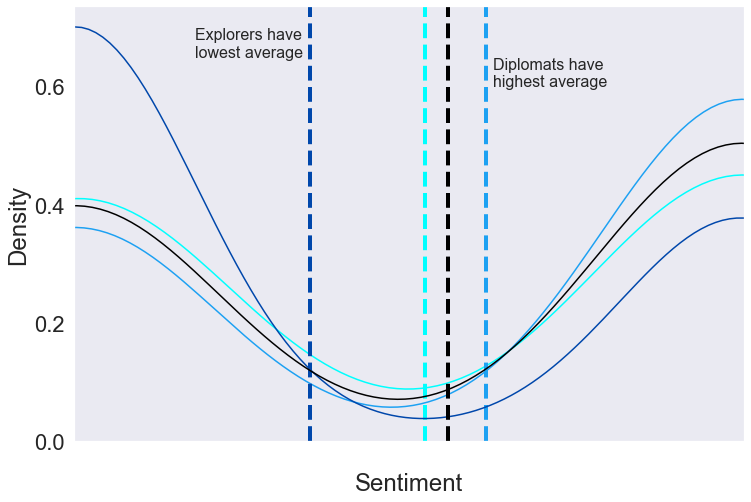

In [88]:
plt.figure(figsize=(12,8))
# plt.style.use("dark_background")
sns.kdeplot(train[train.domain == 'analyst'].sentiment, label='analyst', color='#00FFFF')
plt.axvline(train[train.domain == 'analyst'].sentiment.mean(), color='#00FFFF', ls='--', lw='4')
sns.kdeplot(train[train.domain == 'diplomat'].sentiment, label='diplomat', color='#1DA1F2')
plt.axvline(train[train.domain == 'diplomat'].sentiment.mean(), color='#1DA1F2', ls='--', lw='4')
sns.kdeplot(train[train.domain == 'explorer'].sentiment, label='explorer', color='#0047AB')
plt.axvline(train[train.domain == 'explorer'].sentiment.mean(), color='#0047AB', ls='--', lw='4')
sns.kdeplot(train[train.domain == 'sentinel'].sentiment, label='sentinel', color='black')
plt.axvline(train[train.domain == 'sentinel'].sentiment.mean(), color='black', ls='--', lw='4')
plt.text(-.64,.65,'''Explorers have
lowest average''', fontsize=16)
plt.text(.25,.6,'''Diplomats have
highest average''', fontsize=16)
plt.xlim(-1,1)
# plt.title('Explorers have the Only Negative Average Compound Sentiment')
plt.xlabel('''
Sentiment''')
plt.xticks(ticks=[])
plt.yticks(ticks=[0,.2,.4,.6])
plt.grid(visible=False)
# plt.legend(loc='lower left', fontsize=18)
plt.legend([],[],frameon=False)
plt.savefig('sentiment.png')
plt.show()

In [37]:
train[train.domain == 'diplomat'].sentiment.mean()

0.22935692307692312

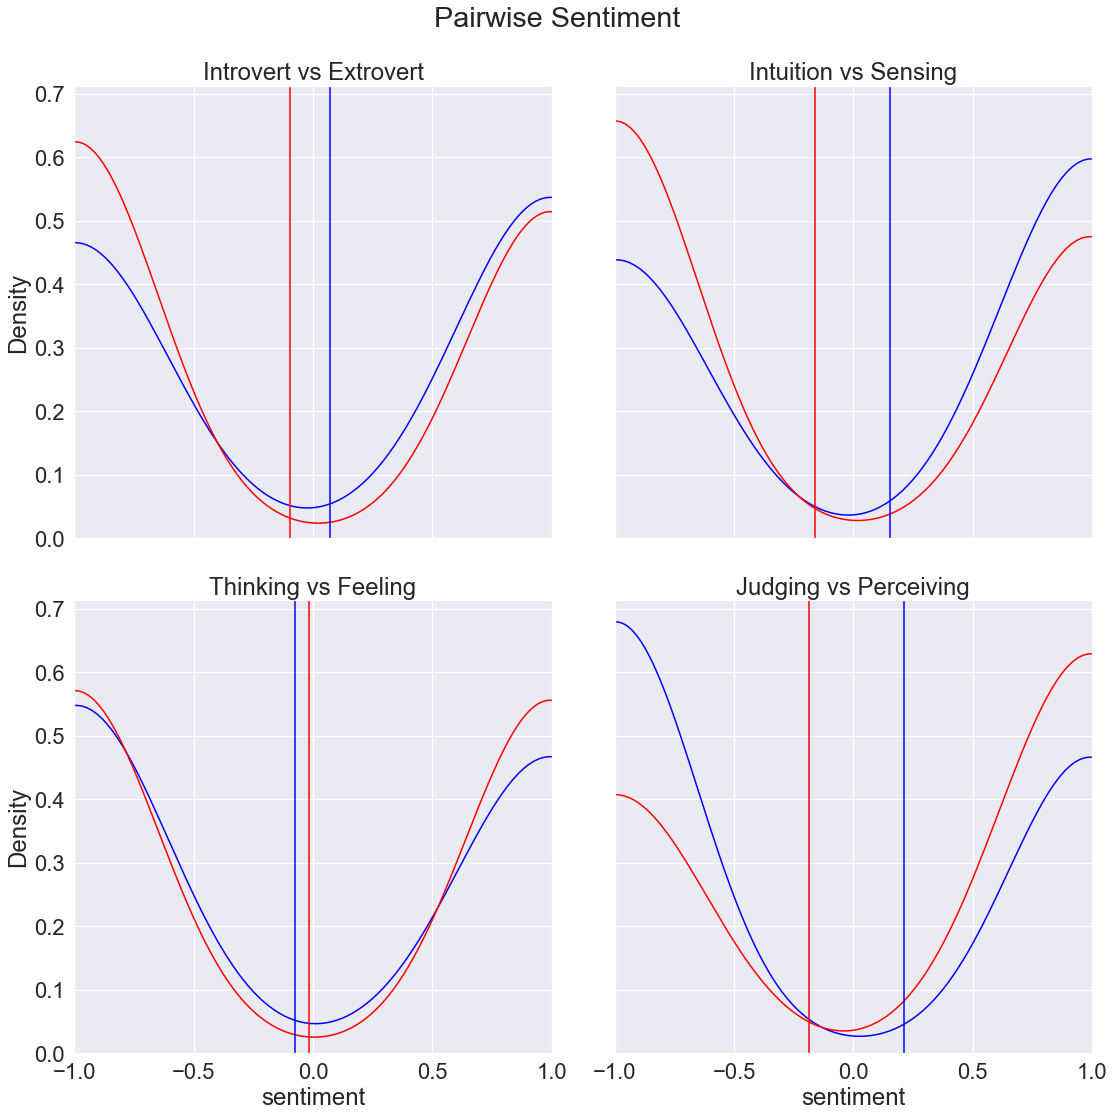

In [31]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(16,16))

sns.kdeplot(ax=axes[0,0], data=train[train['i_e'] == 'i'].sentiment,
            label='introvert', color='blue')
sns.kdeplot(ax=axes[0,0], data=train[train['i_e'] == 'e'].sentiment,
            label='extrovert', color='red')
axes[0,0].axvline(train[train['i_e'] == 'i'].sentiment.mean(), color='blue')
axes[0,0].axvline(train[train['i_e'] == 'e'].sentiment.mean(), color='red')
axes[0,0].set_xlim(-1,1)
axes[0,0].set_title('Introvert vs Extrovert')



sns.kdeplot(ax=axes[0,1], data=train[train['n_s'] == 'n'].sentiment,
            label='intuition', color='blue')
sns.kdeplot(ax=axes[0,1], data=train[train['n_s'] == 's'].sentiment,
            label='sensing', color='red')
axes[0,1].axvline(train[train['n_s'] == 'n'].sentiment.mean(), color='blue')
axes[0,1].axvline(train[train['n_s'] == 's'].sentiment.mean(), color='red')
axes[0,1].set_xlim(-1,1)
axes[0,1].set_title('Intuition vs Sensing')




sns.kdeplot(ax=axes[1,0], data=train[train['t_f'] == 't'].sentiment,
            label='thinking', color='blue')
sns.kdeplot(ax=axes[1,0], data=train[train['t_f'] == 'f'].sentiment,
            label='feeling', color='red')
axes[1,0].axvline(train[train['t_f'] == 't'].sentiment.mean(), color='blue')
axes[1,0].axvline(train[train['t_f'] == 'f'].sentiment.mean(), color='red')
axes[1,0].set_xlim(-1,1)
axes[1,0].set_title('Thinking vs Feeling')



sns.kdeplot(ax=axes[1,1], data=train[train['j_p'] == 'p'].sentiment,
            label='perceiving', color='blue')
sns.kdeplot(ax=axes[1,1], data=train[train['j_p'] == 'j'].sentiment,
            label='judging', color='red')
axes[1,1].axvline(train[train['j_p'] == 'j'].sentiment.mean(), color='blue')
axes[1,1].axvline(train[train['j_p'] == 'p'].sentiment.mean(), color='red')
axes[1,1].set_xlim(-1,1)
axes[1,1].set_title('Judging vs Perceiving')



fig.suptitle('Pairwise Sentiment')
plt.tight_layout()
# plt.legend()
plt.show()

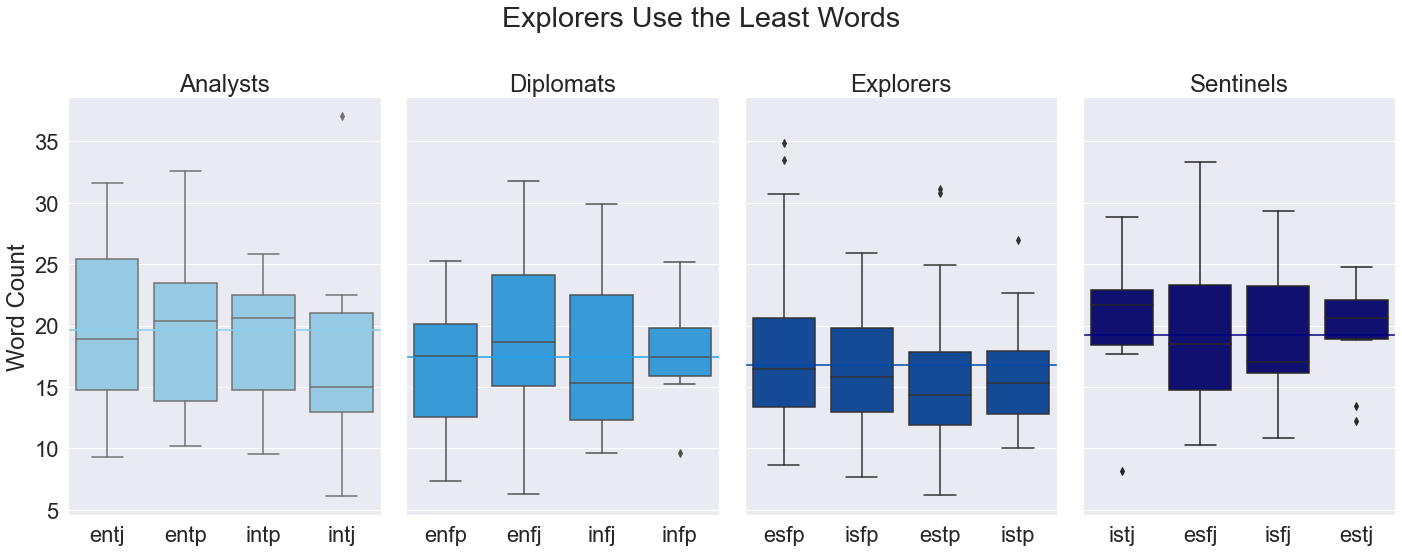

In [32]:
fig, axes = plt.subplots(1, 4, sharey=True, figsize=(20,8))
sns.boxplot(ax=axes[0], data=train[train.domain == 'analyst'], x='type', y='words_per_tweet', palette=['#89CFF0','#89CFF0','#89CFF0','#89CFF0'])
axes[0].axhline(train[train.domain == 'analyst'].words_per_tweet.mean(), color = '#89CFF0')
# axes[0].axhline(train[train.domain == 'diplomat'].words_per_tweet.mean(), color = 'orange')
# axes[0].axhline(train[train.domain == 'explorer'].words_per_tweet.mean(), color = 'red')
# axes[0].axhline(train[train.domain == 'sentinel'].words_per_tweet.mean(), color = 'green')
axes[0].set_ylabel('Word Count')
axes[0].set_xlabel('')
axes[0].set_title('Analysts')

sns.boxplot(ax=axes[1], data=train[train.domain == 'diplomat'], x='type', y='words_per_tweet', palette=['#1DA1F2','#1DA1F2','#1DA1F2','#1DA1F2'])
# axes[1].axhline(train[train.domain == 'analyst'].words_per_tweet.mean(), color = 'blue')
axes[1].axhline(train[train.domain == 'diplomat'].words_per_tweet.mean(), color = '#1DA1F2')
# axes[1].axhline(train[train.domain == 'explorer'].words_per_tweet.mean(), color = 'red')
# axes[1].axhline(train[train.domain == 'sentinel'].words_per_tweet.mean(), color = 'green')
axes[1].set_ylabel('')
axes[1].set_xlabel('')
axes[1].set_title('Diplomats')

sns.boxplot(ax=axes[2], data=train[train.domain == 'explorer'], x='type', y='words_per_tweet', palette=['#0047AB','#0047AB','#0047AB','#0047AB'])
# axes[2].axhline(train[train.domain == 'analyst'].words_per_tweet.mean(), color = 'blue')
# axes[2].axhline(train[train.domain == 'diplomat'].words_per_tweet.mean(), color = 'orange')
axes[2].axhline(train[train.domain == 'explorer'].words_per_tweet.mean(), color = '#0047AB')
# axes[2].axhline(train[train.domain == 'sentinel'].words_per_tweet.mean(), color = 'green')
axes[2].set_ylabel('')
axes[2].set_xlabel('')
axes[2].set_title('Explorers')

sns.boxplot(ax=axes[3], data=train[train.domain == 'sentinel'], x='type', y='words_per_tweet', palette=['#000080','#000080','#000080', '#000080'])
# axes[3].axhline(train[train.domain == 'analyst'].words_per_tweet.mean(), color = 'blue')
# axes[3].axhline(train[train.domain == 'diplomat'].words_per_tweet.mean(), color = 'orange')
# axes[3].axhline(train[train.domain == 'explorer'].words_per_tweet.mean(), color = 'red')
axes[3].axhline(train[train.domain == 'sentinel'].words_per_tweet.mean(), color = '#000080')
axes[3].set_ylabel('')
axes[3].set_xlabel('')
axes[3].set_title('Sentinels')


fig.suptitle('Explorers Use the Least Words')
plt.tight_layout()
# plt.savefig('tweet_length.png')
plt.show()

In [38]:
train[train.domain == 'explorer'].words_per_tweet.mean()

16.764789915966382

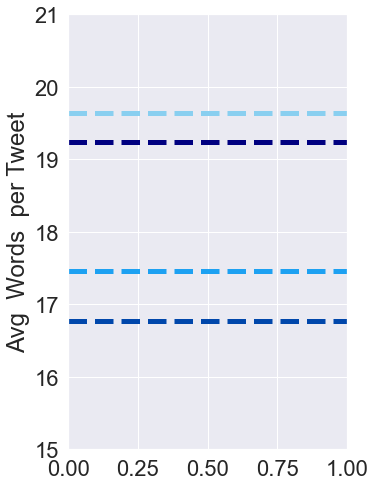

In [33]:
plt.figure(figsize=(5,8))
plt.axhline(train[train.domain == 'analyst'].words_per_tweet.mean(),
            color = '#89CFF0',
            linestyle='--',
            lw=5)
plt.axhline(train[train.domain == 'diplomat'].words_per_tweet.mean(),
            color = '#1DA1F2',
            linestyle='--',
            lw=5)
plt.axhline(train[train.domain == 'explorer'].words_per_tweet.mean(),
            color = '#0047AB', 
            linestyle='--',
            lw=5)
plt.axhline(train[train.domain == 'sentinel'].words_per_tweet.mean(),
            color = '#000080',
            linestyle='--',
            lw=5)
plt.ylim(15,21)
plt.ylabel('Avg  Words  per Tweet')
# plt.title('Domain Averages')
plt.savefig('words_per_tweet.png', pad_inches=1)
plt.show()

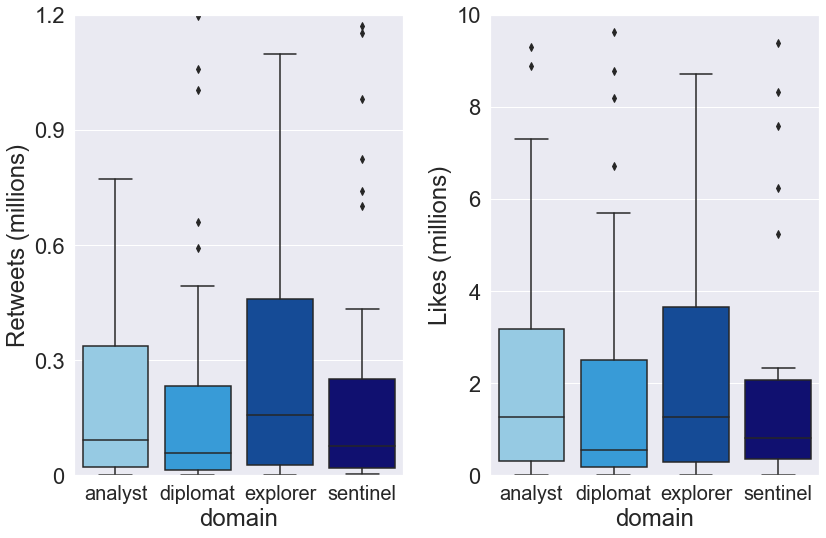

In [41]:
fig, axes = plt.subplots(1, 2, figsize=(12,8))
# fig.suptitle('Explores Receive the Most Likes and Retweets on Average')
sns.set(font_scale=2)
sns.boxplot(ax=axes[0],data=train, y='retweetCount', x='domain',
            order=['analyst', 'diplomat', 'explorer','sentinel'],
           palette=['#89CFF0','#1DA1F2','#0047AB','#000080'])
axes[0].set_ylim(0,1200000)
axes[0].set_yticks(ticks=[0,300_000,600_000,900_000,1_200_000], labels=['0', '0.3', '0.6', '0.9', '1.2'])
axes[0].set_ylabel('Retweets (millions)')
axes[0].tick_params(axis='x', which='major', labelsize=20)

sns.boxplot(ax=axes[1],data=train, y='likeCount', x='domain',
            order=['analyst', 'diplomat', 'explorer','sentinel'],
            palette=['#89CFF0','#1DA1F2','#0047AB','#000080'])
axes[1].set_ylim(0,10000000)
axes[1].set_yticks(ticks=[0,2_000_000,4_000_000,6_000_000,8_000_000, 10_000_000], labels=['0', '2', '4', '6', '8', '10'])
axes[1].set_ylabel('Likes (millions)')
# axes[1].set_xticks(fontsize=20)
axes[1].tick_params(axis='x', which='major', labelsize=20)


plt.tight_layout()
plt.savefig('likes_retweets.png')
plt.show()

/opt/homebrew/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:163: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if palette in QUAL_PALETTES:
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


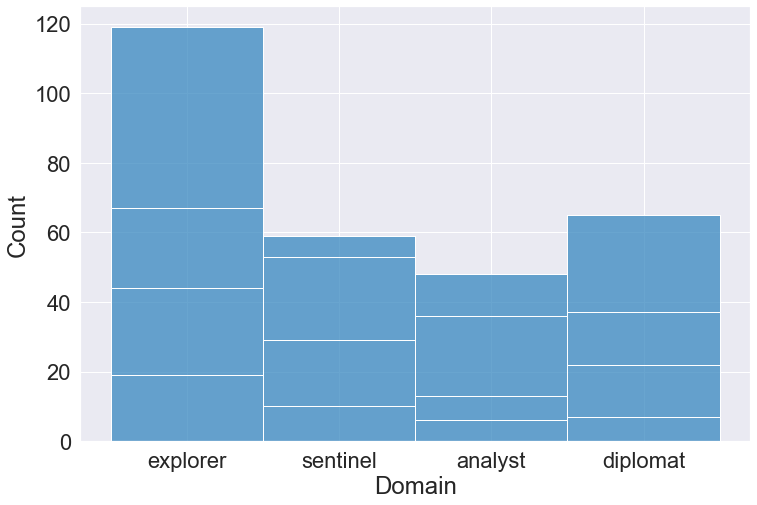

In [45]:
plt.figure(figsize=(12,8))
# palette = {c: "green" if c in ['intj', 'intp', 'entj', 'entp']  else 'r' for c in df['type']}
ax = sns.histplot(data=train,
                  x='domain',
                  hue='type',
                  discrete=True, 
                  multiple='stack', 
                  palette=np.array(sns.color_palette("Blues_d", 1))
                  # color = ['#1DA1F2']
                 )

# # analysts
# plt.text(1.88, 1.8, 'INTJ', fontsize=16)
# plt.text(1.88, 8, 'INTP', fontsize=16)
# plt.text(1.86, 23, 'ENTP', fontsize=16)
# plt.text(1.86, 40, 'ENTJ', fontsize=16)

# # sentinels
# plt.text(.88, 40, 'ESFJ', fontsize=16)
# plt.text(.89, 18, 'ISFJ', fontsize=16)
# plt.text(.88, 2.8, 'ESTJ', fontsize=16)
# plt.text(.89, 54.5, 'ISTJ', fontsize=16)

# # explorers
# plt.text(-.11, 30, 'ESTP', fontsize=16)
# plt.text(-.11, 90, 'ESFP', fontsize=16)
# plt.text(-.1, 8, 'ISTP', fontsize=16)
# plt.text(-.1, 55, 'ISFP', fontsize=16)

# # diplomats
# plt.text(2.87, 28, 'ENFJ', fontsize=16)
# plt.text(2.89, 2.2, 'INFP', fontsize=16)
# plt.text(2.87, 49, 'ENFP', fontsize=16)
# plt.text(2.89, 13, 'INFJ', fontsize=16)


plt.xlabel('Domain')
# plt.ylabel('Twitter Accounts')
plt.legend().set_visible(False)
# plt.title('Data Population Split by Domain and Type')
plt.savefig('data_pop.png')
plt.show() 

In [76]:
train[train.domain =='diplomat'].type.value_counts()

enfp    28
enfj    15
infj    15
infp     7
Name: type, dtype: int64